# Toy BlackJack

Simulation of a BlackJack Toy Model. It follows the same idea as standard BlackJack,
but with simplified rules.    
There is no splitting of pairs or doubling up bets, thus, the only
allowed plays are Stand or Hit.

## Simulated Players:

The class "Players" provide 3 different kinds of player plus the dealer, each of them following a different strategy.

### Basic:
The Basic player always makes the same bet and follows a simple strategy
that takes into account the current value of the hand and the dealer's card that is public.    
More details can be found here:      
https://bicyclecards.com/how-to-play/blackjack/

### Simplest Player:
There is also a Bad player simulation that will always make the same bet and
always follow the pattern:
1. If hand total >= 17: Stand
2. Else: Hit

### Chart Player:
And finally a player that follows the chart here:

https://www.blackjackapprenticeship.com/blackjack-strategy-charts/

### Dealer:
The dealer will always follow the steps:

1. If hand total > 17: Stand
2. If hand total < 17: Hit
3. If hand total = soft 17 (with an Ace): Hit
4. If hand total = hard 17 (without and Ace): Stand

## Payouts:
The payout is as follows:

1. If players have a BlackJack and the Dealer does not,
the players are awarded 1.5x their initial bets.
2. If the players beat the dealer without a BlackJack, they receive 1x their initial bets.
3. If the players bust (>21) or if the dealer wins, they lose their initial bets.
3. In case of a draw (BlackJack draw also), the initial bet is returned to each player.

# Initial Analysis:

Let's start looking at a simple comparison between all 3 players's performances:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('Modules')

import Rounds
import Decks
import Players

In [2]:
def pipeline(name, game, Nrounds=1):
    wins = 0
    profit = [game.players[0].stack]
    for _ in range(Nrounds):
        if len(game.GetDeck()) < ncards_min:
            deck = Decks.MakeDecks(ndecks)
            game.SetDeck(deck)
            for player in game.players:
                player.ResetCount()
        nplayers = 1  # + np.random.randint(Nplayers)
        game.SetNPlayers(nplayers=nplayers)
        game.MakeBets()
        game.SetUp()
        game.TakeActions()
        game.PayOuts()
        deck = game.GetDeck()
        profit.append(game.players[0].stack)
        if game.players[0].Win(game.dealer) > 0: wins += 1
    
    pct = round(100.*wins / Nrounds, 2)
    print(f'{name}:')
    print(f'Wins = {wins} / {Nrounds} = {pct}%')
    profit = np.array(profit)
    plt.plot(profit, 'b-')
    plt.show()
    return pct

For now, let us simply use 1 deck, since we have not implemented card counting yet,
so it does not make any difference.

Also, let's play with one player at a time for convenience, but again, it does not make
a difference since no card counting is implemented yet.

In [10]:
ndecks = 1
ncards_min = 20
Nplayers = 1  # 4
stack = 10_000
stacks = [stack] * Nplayers
count = 0
counts = [count] * Nplayers
deck = Decks.MakeDecks(ndecks)

Nrounds = 100_000

## Basic Player:

Basic Player:
Wins = 43052 / 100000 = 43.05%


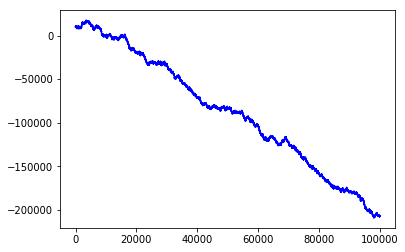

In [11]:
game_basic = Rounds.Round(deck, Nplayers=Nplayers, stacks=stacks, counts=counts)
basic_pct = pipeline('Basic Player', game_basic, Nrounds=Nrounds)

Bad Player:
Wins = 40639 / 100000 = 40.64%


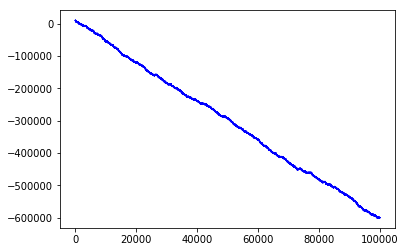

In [12]:
players = [Players.BadPlayer(stack=stack, count=count)]
game_bad = Rounds.Round(deck, Nplayers=Nplayers, players=players, stacks=stacks, counts=counts)
bad_pct = pipeline('Bad Player', game_bad, Nrounds=Nrounds)

Chart Player:
Wins = 43239 / 100000 = 43.24%


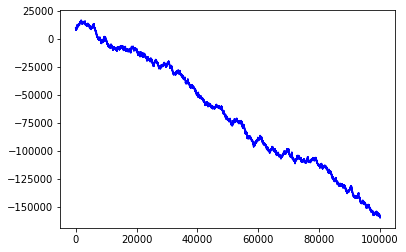

In [13]:
players = [Players.ChartPlayer(stack=stack, count=count)]
game_chart = Rounds.Round(deck, Nplayers=Nplayers, players=players, stacks=stacks, counts=counts)
chart_pct = pipeline('Chart Player', game_chart, Nrounds=Nrounds)

In [14]:
print(f'Basic: {basic_pct}%')
print(f'Bad: {bad_pct}%')
print(f'Chart: {chart_pct}%')

Basic: 43.05%
Bad: 40.64%
Chart: 43.24%
